In [1]:
import matplotlib

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import geojsoncontour
import os
%matplotlib inline

In [3]:
def setup(filename, var):
    data = xr.open_dataset(filename)
    lon_range = data.variables['lon'].data
    lat_range = data.variables['lat'].data
    lon_range, lat_range
    X, Y = np.meshgrid(lon_range,lat_range)
    mini, maxi = np.nanmin(data.variables[var].data), np.nanmax(data.variables[var].data)
    min2, max98 = np.nanpercentile(data.variables[var].data,2), np.nanpercentile(data.variables[var].data, 98)
    unit = data.variables[var].attrs['units']
    print("Min {}; Max {}".format(mini,maxi))
    print("Min {}; Max {}".format(min2,max98))
    Z = getattr(data, var)
    return X,Y,Z,unit, var

X,Y,Z,unit,var = setup('./sresa1b_ncar_ccsm3-example.nc', 'tas')

Min 205.2432098388672; Max 309.09613037109375
Min 214.53561340332033; Max 301.7061547851563


Min 205.2432098388672; Max 309.09613037109375; Time 0


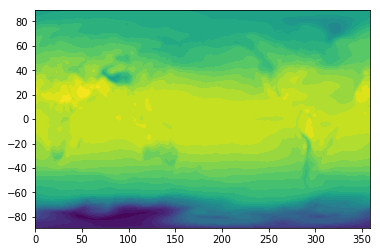

In [7]:
figure = plt.figure()
ax = figure.add_subplot(111)
for t in range(len(Z.time)):
    third = Z.isel(time=t)
    if len(third.dims) == 3:
        last_pos = 50 # len(getattr(third, third.dims[0]))-1
        third = third[last_pos,]
    levels = np.linspace(start=np.nanmin(third),stop=np.nanmax(third), num=30)
    print("Min {}; Max {}; Time {}".format(levels[0],levels[-1],t))
    contourf = ax.contourf(X, Y, third, levels=levels, cmap=plt.cm.viridis)

[Mapshaper](http://www.mapshaper.org)

In [10]:
# Convert matplotlib contour to geojson
geojsoncontour.to_geojson(
    contour=contourf, multipolys=False,
    geojson_filepath='out.geojson',
    contour_levels=levels,
#     min_angle_deg=5.0,
    ndigits=3,
    unit='m'
)